# Multilayer Perceptrons
**Multilayer perceptrons** consist of multiple layers of neurons each fully connected to those in the layer below (receive input) and above (they can influence).
## 5.1. Multilayer Perceptrons
### 5.1.1. Hidden Layers
#### 5.1.1.1. Limitations of Linear Models
linearity (in affine transformations) is a strong assumption. It implies the weaker assumption of monotonicity: any increase in our feature must either always cause an increase in our model’s output (if the corresponding weight is positive), or always cause a decrease in our model’s output (if the corresponding weight is negative)
#### 5.1.1.2. Incorporating Hidden Layers
Use hidden layers to overcome the limitations of linear models.  
**Multilayer perceptron MLP**: stack many fully connected layers on top of one another. Each feeds into the layer above it until outputs.  
MLP structure: Ex. 4 input --> 5 hidden units --> 3 outputs, total 2 layers (input has no calculation)
#### 5.1.1.3. From Linear to Nonlinear
- matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$: a minibatch of $n$ examples, each has $d$ inputs(features)  
- hidden representationsone $\mathbf{H} \in \mathbb{R}^{n \times h}$: hidden-layer MLP with $h$ units
- hidden-layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
- output-layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$
- output $\mathbf{O} \in \mathbb{R}^{n \times q}$ can be calculated as: 
$$
\begin{split}\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}\end{split}
$$
$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$
For the potential of multilayer architectures, wee need: a nonlinear **activation function $\sigma$** to be applied to each hidden unit following the affine transformation. Ex. ReLU $\sigma(x) = \mathrm{max}(0, x)$. Output of activation functions $\sigma(\cdot)$ is **activations**.  
With acivation functions, we cannot collapse MLP into a linear model:
$$
\begin{split}\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}\end{split}
$$


#### 5.1.1.4. Universal Approximators
With a single-hidden-layer network, given enough nodes (possibly absurdly many), and the right set of weights, we can model any function.  
Use kernel methods or deeper networks to solve problems more effective.

### 5.1.2 Activation Functions
Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it. They are differentiable operators for transforming input signals to outputs, while most of them add nonlinearity.
#### 5.1.2.1. ReLU Function
**Rectified linear unit (ReLU)**: $\operatorname{ReLU}(x) = \max(x, 0).$

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

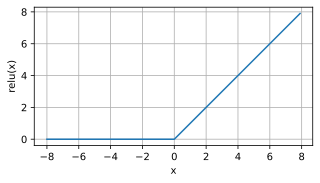

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

- input <= 0: derivative of ReLU = 0
- input > 0: derivative of ReLU = 1

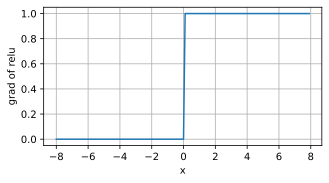

In [3]:
# derivative of ReLU
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))


**Parametrized ReLU (pReLU)**: add linear term to ReLU $\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$

#### 5.1.2.2 Sigmoid Function
**Sigmoid function** transforms inputs in $\mathbb{R}$ to outputs in (0, 1)  
Also called squashing function: it squashes any input in the range (-inf, inf) to some value in the range (0, 1)
$$
\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.
$$
the sigmoid function was a natural choice because it is a smooth, differentiable approximation to a thresholding unit: takes value 0 when its input is below some threshold and value 1 when the input exceeds the threshold.  
ReLU is simpler and more easily trainable when used in hidden layers. Sigmoid's gradient vanishes for large + & - arguments.

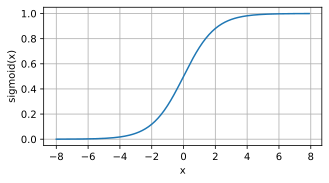

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

Derivative of sigmoid: $\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$  
Max = 0.25 when input = 0  


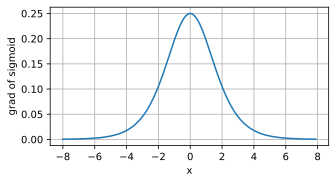

In [5]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### 5.1.2.3. Tanh Function
**Tanh** (hyperbolic tangent) function also squashes inputs like sigmoid to range (-1, 1): $\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$. It has point symmetry about the origin of the coordinate system

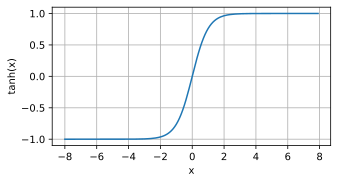

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Derivative of tanh function: $\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$  
Max = 1 when input = 0

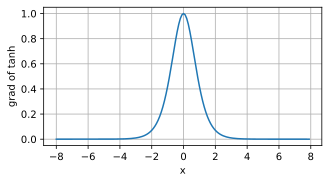

In [7]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### 5.1.3. Summary and Discussion
- ReLU is more amenable to optimization than the sigmoid or the tanh
- Other activation functions: GELU Gaussion error linear unit, Swish activation function

## 5.2. Implementation of Multilayer Perceptrons
### 5.2.1. Implementation from Scratch
#### 5.2.1.1. Initializing Model Parameters
For Fashin-MNIST: 10 classes, each 28*28 = 784 grayscale pixel values.  
TODO: an MLP multilayer perceptrons with 1 hidden layer, 256 hidden units. For every layer, keep weight matrix & bias vector.

In [9]:
from torch import nn

In [10]:
# use nn.Parameter so that we can use autograd
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

#### 5.2.1.2 Model

In [11]:
# implement ReLU
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [12]:
# reshape image into flat vector of length num_inputs
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

#### 5.2.1.3 Training

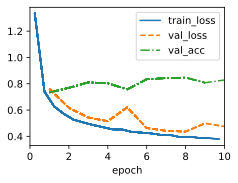

In [13]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.2.2. Concise Implementation
#### 5.2.2.1 Model
Add 2 fully connected layers: the hidden layer and the output (in 4.5 only one layer)

In [14]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

In 4.5 we defined ```foward``` methods but no such method here. ```MLP``` inherits ```forward``` from ```Module``` class to invoke ```self.net(X)```. ```Sequential``` class abstracts the forward process.

#### 5.2.2.2 Training

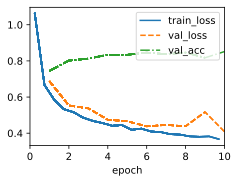

In [15]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

### 5.2.3 Summary
- implementing MLPs from scratch is messy: naming and keeping track of the model parameters makes it difficult to extend models

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs
So far only worried about **forward propagation**, for gradients only invoked the backpropagation function in framework.  
This section: **Backward propagation** / backpropagation
### 5.3.1 Forward Propagation
**Forward propagation / forward pass** is the calculation and storage of intermediate variables for a neural network in order from the input layer to the output layer.  
- Input: $\mathbf{x}\in \mathbb{R}^d$. 
- Hidden layer has no bias. Intermediate variable: $\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ 
- hidden activation vector of length $h$ (also an intermediate variable): $\mathbf{h}= \phi (\mathbf{z}), \mathbf{z}\in \mathbb{R}^h$
- Hidden layer output $\mathbf h$: $\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}, \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$
- Loss for the single data example: $L = l(\mathbf{o}, y).$
- The $\ell_2$ regularization term: $s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_\textrm{F}^2 + \|\mathbf{W}^{(2)}\|_\textrm{F}^2\right),$
- Regularized loss on a given data example / **objective function $J$**: $J = L + s.$

### 5.3.2. Computational Graph of Forward Propagation
Use **computational graphs** to visualize the dependencies of operators and variables within the calculation.

### 5.3.3 Backpropagation
**Backpropagation** refers to the method of calculating the gradient of neural network parameters. The method traverses the network in reverse order, from the output to the input layer, according to the **chain rule** from calculus.  
With function $\mathsf{Y}=f(\mathsf{X}), \mathsf{Z}=g(\mathsf{Y})$, by chain rule we can compute the derivative of $\mathsf Z$ with respect to $\mathsf X$: $\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \textrm{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$ $\textrm{prod}$ is used to multiply its arguments after the necessary operations, such as transposition and swapping input positions, have been carried out.  
Parameters on hidden layer is $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}$. To calculate $\partial J/\partial \mathbf{W}^{(1)}, \partial J/\partial \mathbf{W}^{(2)}$:
- Compute grad of objective function $J=L+s$ with respect to the loss term $L$ and regularization term $s$: $\frac{\partial J}{\partial L} = 1 \; \textrm{and} \; \frac{\partial J}{\partial s} = 1.$
- Compute grad of objective function with respect to the output layer $\mathbf{o}$: $\frac{\partial J}{\partial \mathbf{o}} = \textrm{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right) = \frac{\partial L}{\partial \mathbf{o}}\in \mathbb{R}^q.$
- Compute grad of the regularization term with respect to both parameters: $\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}\; \textrm{and} \; \frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$
- Compute grad $\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$: $\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$
- For grad with respect to $\mathbf{W}^{(1)}$, need grad with respect to the hidden layer output first: $\frac{\partial J}{\partial \mathbf{h}}= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.$
- The grad of the intermediate variable $\mathbf{z}$ is: $\frac{\partial J}{\partial \mathbf{z}}= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).$
- Get grad of the model parameters closest to the input layer: $\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \textrm{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \textrm{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.$ 

### 5.3.4 Training Neural Networks
Forward and backward propagation depend on each other when training.  
During forward propagation: compute regularization term depents on current parameters $\mathbf{W}^{(1)},\mathbf{W}^{(2)}$, given by optimization algo according to backpropagation in the most recent iteration.  
Gradient calculation for the parameters  during backpropagation depends on current values of the hidden layer output, given by forward propagation.
### 5.3.5. Summary
- Forward propagation sequentially calculates and stores intermediate variables within the computational graph defined by the neural network. --> compute prediction and error using current parameters
- Backpropagation sequentially calculates and stores the gradients of intermediate variables and parameters within the neural network in the reversed order. --> determine how each parameter contributed to the error

## 5.4. Numerical Stability and Initialization
Choice of initialization of parameters.
### 5.4.1. Vanishing and Exploding Gradients
Gradient of output $\mathbf{o}$ with respect to an set of parameters $\mathbf{W}^{(l)}$ of a deep network with $L$ layers and input $\mathbf{x}$ can be written as: $\partial_{\mathbf{W}^{(l)}} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{(L-1)}} \mathbf{h}^{(L)}}_{ \mathbf{M}^{(L)} \stackrel{\textrm{def}}{=}} \cdots \underbrace{\partial_{\mathbf{h}^{(l)}} \mathbf{h}^{(l+1)}}_{ \mathbf{M}^{(l+1)} \stackrel{\textrm{def}}{=}} \underbrace{\partial_{\mathbf{W}^{(l)}} \mathbf{h}^{(l)}}_{ \mathbf{v}^{(l)} \stackrel{\textrm{def}}{=}}.$, which is a product of matrices.  
Problems of numerical underflow occour when multiplying together too many probabilities. Also the initial matrices may be large, so the product might be very large or very small.  
We may be facing parameter updates that are 
- excessively large, destroying our model (the **exploding gradient** problem)
- excessively small (the **vanishing gradient** problem), rendering learning impossible as parameters hardly move on each update.

#### 5.4.1.1. Vanishing Gradients
One causing: choice of the activation function --> sigmoid function can cause it.  
Sigmoid's gradient vanishes when inputs are large and small. When backpropagating through many layers, unless we are in the Goldilocks zone, where the inputs to many of the sigmoids are close to zero, the gradients of the overall product may vanish.  
ReLU is more stable but less neurally plausible, become the default choice.

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

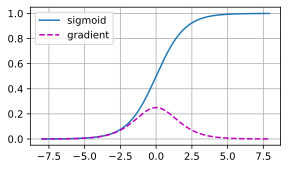

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

#### 5.4.1.2. Exploding Gradients
When this happens because of the initialization of a deep network, we have no chance of getting a gradient descent optimizer to converge. Occur when $\|M\|_2 > 1$

In [3]:
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n',M)
for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))
print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[-0.1696,  0.4417,  0.2445, -0.4816],
        [ 0.0314, -0.5656,  0.3367, -1.4428],
        [ 1.4113,  1.4008,  0.0559,  1.3887],
        [ 0.4816,  0.1047, -0.5299, -0.0731]])
after multiplying 100 matrices
 tensor([[-3.2778e+25,  2.0303e+25,  7.7414e+24, -1.1257e+25],
        [-5.7384e+25,  3.5543e+25,  1.3553e+25, -1.9707e+25],
        [ 4.1667e+25, -2.5808e+25, -9.8407e+24,  1.4309e+25],
        [ 6.9334e+25, -4.2945e+25, -1.6375e+25,  2.3811e+25]])


#### 5.4.1.3. Breaking the Symmetry
Hidden neurons in the same layer are interchangeable. If neurons start equal, gradient descent keeps them equal forever.  
Different parameter settings can represent the same function. Minibatch stochastic gradient descent would not break this symmetry, dropout regularization would.

### 5.4.2. Parameter Initialization
#### 5.4.2.1. Default Initialization
The framework will use a default random initialization method.
#### 5.4.2.2. Xavier Initialization
For fully connected layer without nonlinearities (activate functions):  
$n_\textrm{in}$ inputs $x_j$ and their weights $w_{ij}$ for the layer, the output is: $o_{i} = \sum_{j=1}^{n_\textrm{in}} w_{ij} x_j.$  
Weights $w_{ij}$ are drawn indenpendently from a distribution with mean = 0, var = $\sigma^2$. Inputs to the layer $x_j$ have mean = 0, var = $\gamma^2$. The mean and variance of $o_i$ is:  
$$
\begin{split}\begin{aligned}
    E[o_i] & = \sum_{j=1}^{n_\textrm{in}} E[w_{ij} x_j] \\&= \sum_{j=1}^{n_\textrm{in}} E[w_{ij}] E[x_j] \\&= 0, \end{aligned}\end{split}
    $$
$$
\begin{split}\begin{aligned}
    \textrm{Var}[o_i] & = E[o_i^2] - (E[o_i])^2 \\
        & = \sum_{j=1}^{n_\textrm{in}} E[w^2_{ij} x^2_j] - 0 \\
        & = \sum_{j=1}^{n_\textrm{in}} E[w^2_{ij}] E[x^2_j] \\
        & = n_\textrm{in} \sigma^2 \gamma^2.
\end{aligned}\end{split}
$$
To keep variance fixed, set $n_\textrm{in} \sigma^2 = 1$.  
For backpropagation, grad var blow up unless $n_\textrm{out} \sigma^2 = 1$.  
We need to satisfy: $\begin{aligned}\frac{1}{2} (n_\textrm{in} + n_\textrm{out}) \sigma^2 = 1 \textrm{ or equivalently }\sigma = \sqrt{\frac{2}{n_\textrm{in} + n_\textrm{out}}}.\end{aligned}$  
**Xavier initialization**: samples weights from a Gaussian distribution with mean = 0 and variance $\sigma^2 = \frac{2}{n_\textrm{in} + n_\textrm{out}}$. Or sampling weights from a uniform distribution $U(-a, a)$ with variance $\frac{a^2}{3}$, plug in to the condition on $\sigma^2$ which is: $U\left(-\sqrt{\frac{6}{n_\textrm{in} + n_\textrm{out}}}, \sqrt{\frac{6}{n_\textrm{in} + n_\textrm{out}}}\right).$

#### 5.4.2.3 Beyond
More ways of initialization: tied (shared) parameters, super-resolution, sequence models, and other situations.
### 5.4.3. Summary
- Vanishing and exploding gradients are common issues in deep networks.
- Random initialization is key to ensuring that symmetry is broken before optimization.
- Xavier initialization suggests that, for each layer, variance of any output is not affected by the number of inputs, and variance of any gradient is not affected by the number of outputs. 
- ReLU activation functions mitigate the vanishing gradient problem. This can accelerate convergence.

## 5.5 Generalization in Deep Learning
Machine learning is a statistical discipline and we wish to optimize training loss only insofar as some statistical principle (known or unknown) leads the resulting models to generalize beyond the training set. If you were looking for a straightforward account of either the optimization story (why we can fit them to training data) or the generalization story (why the resulting models generalize to unseen examples), then you might want to pour yourself a drink.
-  why we are able to optimize neural networks?
-  how models learned by gradient descent manage to generalize so well, even on high-dimensional tasks?

### 5.5.1. Revisiting Overfitting and Regularization
In the classical view, when model overfit, it means the model is too complex, requiring either shrink the number of features, or the size of the parameters.  
Deep learning complicates this picture in counterintuitive way:
- for classification problems: models are typically expressive enough to perfectly fit every training example
- for many deep learning tasks (e.g., image recognition and text classification) we are typically choosing among model architectures, all of which can achieve arbitrarily low training loss (and zero training error), the only avenue for further gains is to reduce overfitting. We can reduce the generalization error further by making the model even **more expressive**.
- the pattern relating the generalization gap to the **complexity** of the model (as captured, for example, in the depth or width of the networks) can be non-monotonic, with greater complexity hurting at first but subsequently helping in a so-called “double-descent” pattern 
- traditional complexity-based generalization bounds, e.g., those based on the VC dimension or Rademacher complexity of a hypothesis class cannot explain why neural networks generalize.

### 5.5.2. Inspiration from Nonparametrics
Example for nonparametric model: k-nearest neighbor.  
Because neural networks are over-parametrized, possessing many more parameters than are needed to fit the training data, they tend to **interpolate** the training data (fitting it perfectly) and thus behave, in some ways, more like nonparametric models.  
More recent theoretical research has established deep connection between large neural networks and nonparametric methods, notably kernel methods: Jacot et al. (2018) demonstrated that in the limit, as multilayer perceptrons with randomly initialized weights grow infinitely wide, they become equivalent to (nonparametric) kernel methods for a specific choice of the kernel function (essentially, a distance function), which they call the neural tangent kernel.

### 5.5.3. Early Stopping
A guarantee on generalization: whenever a model has fitted the cleanly labeled data but not randomly labeled examples included in the training set, it has in fact generalized (Garg et al., 2021).
**early stopping**: a classic technique for regularizing deep neural networks. The most common way to determine the stopping criterion is to monitor validation error throughout training (typically by checking once after each epoch) and to cut off training when the validation error has not decreased by more than some small amount $\epsilon$ for some number of epochs. This is sometimes called a **patience criterion**.   
When there is no label noise and datasets are **realizable** (the classes are truly separable, e.g., distinguishing cats from dogs), early stopping tends not to lead to significant improvements in generalization.   
When there is label noise, or intrinsic variability in the label (e.g., predicting mortality among patients), early stopping is crucial.

### 5.5.4. Classical Regularization Methods for Deep Networks
In deep learning, weight decay remains a popular tool. Typical strengths of $\ell_2$ regularization are insufficient to prevent the networks from interpolating the data. Regularization might only make sense in combination with the early stopping criterion.  
Deep learning researchers have also built on techniques first popularized in classical regularization contexts, such as adding noise to model inputs.


### 5.5.5 Summary
- deep networks tend to be over-parametrized, and for most tasks are capable of perfectly fitting the training set --> ** interpolation regime**
- neural networks look like parametric models but actually more like nonparametric models.
- all deep networks under consideration are capable of fitting all of the training labels, nearly all gains must come by mitigating overfitting (closing the **generalization gap**)
- the interventions that reduce the generalization gap sometimes appear to increase model complexity and at other times appear to decrease complexity.
- why certain choices lead to improved generalization remains for the most part a massive open question despite the concerted efforts of many brilliant researchers.

## 5.6. Dropout
Expectation for a good model: Peform well on unseen data, aim for a simple model (small number of dimensions, measure the inverse norm of the parameters, sensitive to small changes and smoothness).  
**Dropout**: add noise while computing each internal layer during forward propagation. Drop out some neurons during training -- Zeroing out some fraction of the nodes in each layer before calculating the subsequent layer on each iteration. Breaks up **co-adaptation**: each layer relies on a specific pattern of activations in the previous layer.  
How to inject the noise: in an **unbiased** manner so that expected value of each layer = no noise data. Add Gaussian noise $\epsilon \sim \mathcal{N}(0,\sigma^2)$, yielding $\mathbf{x}' = \mathbf{x} + \epsilon$ so that $E[\mathbf{x}'] = \mathbf{x}$  
In standard dropout regularization: 
- zero out some fraction of the nodes in each layer
- **debiase** each layer by normalizing by the fraction of nodes that not dropped. With **dropout probability $p$**, eachintermediate activation $h$ is replaced by a random variable $h'$ with expectation unchanged: $E[h'] = h$: 
$$
\begin{split}\begin{aligned}
h' =
\begin{cases}
    0 & \textrm{ with probability } p \\
    \frac{h}{1-p} & \textrm{ otherwise}
\end{cases}
\end{aligned}\end{split}
$$

### 5.6.1. Dropout in Practice
Outputs are a subset of the original neurons. Calculation of the output layer cannot be overly dependent on any one element.  
- Typically, we disable dropout at test time.
- **uncertainty** of the neural network: use dropout at test time. If the predictions agree across many different dropout outputs, then we might say that the network is more confident.

### 5.6.2. Implementation from Scratch
Draw samples from the uniform distribution $U[0, 1]$, keep those greater than $p$, drop the rest. The ```dropout_layer``` function in input X with probability ```dropout```, rescaling the reminder as dividing the rest by ```1.0-dropout```.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [3]:
# test
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  2.,  0.,  0.,  0., 10.,  0.,  0.],
        [16.,  0., 20.,  0.,  0., 26., 28., 30.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


#### 5.6.2.1. Defining the Model
Model applies dropout to the output of each hidden layer following the activation function. Ensure dropout only active during training.  
Usually set a lower dropout probability closer to the input layer.

In [4]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

#### 5.6.2.2. Training

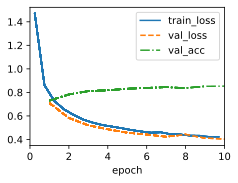

In [5]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### 5.6.3. Concise Implementation
Using APIs we need to add ```Dropout``` layer after each fully connected layer. When not in training, simply pass the data.

In [6]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

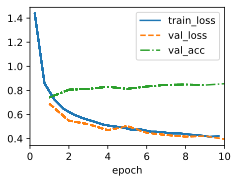

In [7]:
# train the model
model = DropoutMLP(**hparams)
trainer.fit(model, data)

### 5.6.4. Summary
- dropout is used to avoid overfitting (other ways: control # dimension and size of the weight vector)
- dropout is used only during training. Replace an activation $h$ with a random variable with expected value $h$

## 5.7. Predicting House Prices on Kaggle
The house price prediction competition in Kaggle.

In [1]:
%matplotlib inline
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

### 5.7.1. Downloading Data
Skip the implementation for utility functions.

In [2]:
def download(url, folder, sha1_hash=None):
    """Download a file to folder and return the local filepath."""

def extract(filename, folder):
    """Extract a zip/tar file into folder."""

### 5.7.2 Kaggle
Download data from: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### 5.7.3. Accessing and Reading the Dataset
Competition data include training/test sets.

In [3]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [4]:
# data with 1460 samples, 80 features and 1 label
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


### 5.7.4. Data Preprocessing
Take a look at the first 4 and final 2 features and the label, from the first 4 examples.

In [5]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


- first feature is Id: no information, need to be removed before training
- preprocess numerical features: replace all missing values by the corresponding mean, **standardize** the data by rescaling features to mean = 0 and unit variance var = 1 $x \leftarrow \frac{x - \mu}{\sigma}$. Reason: 1. convenient for optimization. 2. not know a **priori** feature, not to penalize coefficients
- Preprocess discrete values: replace by a one-hot encoding

In [6]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):

    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [ ]:

data.preprocess()
data.train.shape

(1460, 331)

### 5.7.5. Error Measure
Train a linear model with squared loss to see whether there is meaningful information in the data.  
For hose prices, we care about relative quantities more than absolute quantities, and measure the discrepancy in the logarithm of the price estimates: root-mean-squared-error between the log of predicted and log of the label. $\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$

In [8]:
@d2l.add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: torch.tensor(x.values.astype(float),
                                      dtype=torch.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

### 5.7.6. $K$-Fold Cross-Validation
A function return the $i^{th}$ fold of the data in a $K$-fold cross-validation procedure: slice out the $i^{th}$ segment as validation data and return the rest as training.

In [9]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

In [10]:
# return avg validation error when train K times in the K-fold cross-validation
def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = d2l.LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

### 5.7.7. Model Selection
Pick an untuned set of hyperparameters as followed.   
$K$-fold cross-validation tends to be reasonably resilient against multiple testing with a large enogh dataset and the normal sorts of hyperparameters. If tried an unreasonably large number of options we might find that our validation performance is no longer representative of the true error.

average validation log mse = 0.1805741846561432


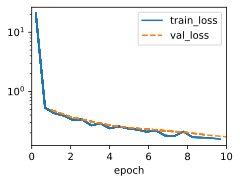

In [11]:
trainer = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

average validation log mse = 0.14947189101949335


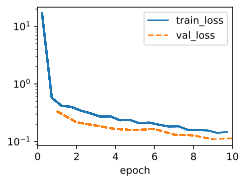

In [22]:
trainer2 = d2l.Trainer(max_epochs=10)
models = k_fold(trainer, data, k=20, lr=0.01)

### 5.7.8. Submitting Predictions on Kaggle
Save the predictions in a csv file and upload the result to Kaggle

In [12]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32))
         for model in models]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)

### 5.7.9. Summary and Discussion
- real data often need to be preprocessed: zero mean, unit variance as default. replace missing values. transform categorical features into indicator features (one-hot vectors)
- measure the discrepancy in the logarithm of the prediction
- to select the model and adjust the hyperparameters, use $K$-fold cross-validation.